#  Simple Linear Regression on the Boston Housing Data  

In [26]:
## Loading the data

import pandas as pd
import numpy as np
names =['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 
    'AGE',  'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/'+
                 'housing/housing.data',                
                 header=None,delim_whitespace=True,names=names)
df.head(6)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7


In [27]:
nsamp, natt = df.shape
print('number of samples in the dataset = {0:d}, number of attributes in the dataset = {1:d}'.format(nsamp,natt))

number of samples in the dataset = 506, number of attributes in the dataset = 14


In [28]:
# creating a response vector `y` with the values in the column `PRICE`
y = np.array(df['PRICE'])

In [29]:
print('The mean house price is {0:5.2f} thousands of dollars'.format(np.mean(y)))
print('Only {0:.1f} per cent are above $40k '.format(np.mean(y>40)*100))

The mean house price is 22.53 thousands of dollars
Only 6.1 per cent are above $40k 


In [30]:
## Visualizing the Data
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Using a predictor vector `x` containing the values in the `RM` column, which represents the average number of rooms in each region.

In [31]:
x = np.array(df['RM'])

Text(0.5,1,'Scatter Plot')

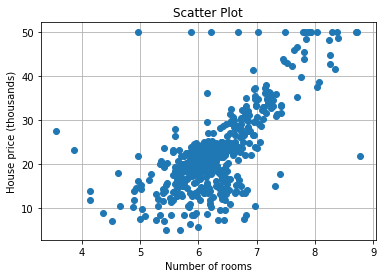

In [32]:
# scatter plot of the price vs. the `RM` attribute
plt.plot(x,y,'o')
plt.xlabel('Number of rooms')
plt.ylabel('House price (thousands)')
plt.grid(True)
plt.title('Scatter Plot')

## Fitting a Simple Linear Model

A simple function to perform a linear fit. 

Using the linear model: $$y =\beta_0 + \beta_1 x + \epsilon$$ 

and computing the parameters $\beta_0,\beta_1$ as well as the coefficient of determination $R^2$.

In [33]:
def fit_linear(x,y):
    """
    Given vectors of data points (x,y), performs a fit for the linear model:
       yhat = beta0 + beta1*x, 
    This function will return beta0, beta1 and rsq, where rsq is the coefficient of determination.
    """
    # TODO complete the following code
    xm = np.mean(x)
    ym = np.mean(y)
    sxx = np.mean((x-xm)**2)
    sxy = np.mean((x-xm)*(y-ym))
    syy = np.mean((y-ym)**2)
    beta1 = sxy/sxx
    beta0 = ym - beta1*xm
    rsq = sxy**2/sxx/syy
    return beta0, beta1, rsq

Using the function `fit_linear` above, printing the values `beta0`, `beta1` and `rsq` for the linear model of price vs. number of rooms.

In [34]:
beta0, beta1, rsq = fit_linear(x,y)
print("beta0 = {0:5.3f}, beta1 = {1:5.3f}, rsq = {2:5.3f}".format(beta0,beta1,rsq))

beta0 = -34.671, beta1 = 9.102, rsq = 0.484


Replotting the scatter plot above with the regression line. The regression line is creating points `xp` from 4 to 9, computing the linear predicted values `yp` on those points and plotting `yp` vs. `xp` on top of the above plot.

In [35]:
xp = np.linspace(4,9,100)
yp = beta0 + beta1*xp

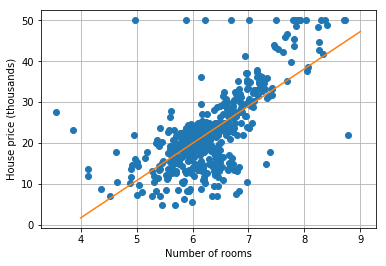

In [36]:
plt.plot(x,y,'o')
plt.plot(xp,yp,'-')
plt.xlabel('Number of rooms')
plt.ylabel('House price (thousands)')
plt.grid(True)

## Coefficients of determination ($R^2$)

Computing the $R^2$ values for all the predictors and output the values in a table. 

In [37]:
for name in names:
    
    # Skipping over the case where the attribute is the target variable.
    if name != 'PRICE':
        
        x = np.array(df[name])
        beta0,beta1,rsq = fit_linear(x,y)
        
        print('{0:10}  {1:.3f}'.format(name, rsq)) 

CRIM        0.151
ZN          0.130
INDUS       0.234
CHAS        0.031
NOX         0.183
RM          0.484
AGE         0.142
DIS         0.062
RAD         0.146
TAX         0.220
PTRATIO     0.258
B           0.111
LSTAT       0.544
